# **Market Basket Analysis using Apriori & FP-Growth**

## **Step 1: Import Libraries**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

## **Step 2: Load & Preprocess Dataset**

In [15]:
df = pd.read_csv('Groceries_dataset.csv')
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_array, columns=te.columns_)
basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## **Step 3: Apply Apriori Algorithm**

In [27]:
frequent_itemsets_ap = apriori(basket, min_support=0.01, use_colnames=True)
rules_ap = association_rules(frequent_itemsets_ap, metric='lift', min_threshold=1)
rules_ap['antecedents'] = rules_ap['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_ap['consequents'] = rules_ap['consequents'].apply(lambda x: ', '.join(list(x)))
rules_ap.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,UHT-milk,beef,0.078502,0.119548,0.010518,0.133987,1.120775,1.0,0.001133,1.016672,0.116940,0.056088,0.016399,0.110985
1,beef,UHT-milk,0.119548,0.078502,0.010518,0.087983,1.120775,1.0,0.001133,1.010396,0.122392,0.056088,0.010289,0.110985
2,UHT-milk,bottled beer,0.078502,0.158799,0.014879,0.189542,1.193597,1.0,0.002413,1.037933,0.176014,0.066897,0.036547,0.141621
3,bottled beer,UHT-milk,0.158799,0.078502,0.014879,0.093700,1.193597,1.0,0.002413,1.016769,0.192815,0.066897,0.016492,0.141621
4,UHT-milk,bottled water,0.078502,0.213699,0.021293,0.271242,1.269268,1.0,0.004517,1.078960,0.230217,0.078598,0.073181,0.185441
5,bottled water,UHT-milk,0.213699,0.078502,0.021293,0.099640,1.269268,1.0,0.004517,1.023477,0.269801,0.078598,0.022939,0.185441
6,UHT-milk,brown bread,0.078502,0.135967,0.012314,0.156863,1.153681,1.0,0.001640,1.024783,0.144557,0.060914,0.024184,0.123714
7,brown bread,UHT-milk,0.135967,0.078502,0.012314,0.090566,1.153681,1.0,0.001640,1.013266,0.154172,0.060914,0.013092,0.123714
8,UHT-milk,butter,0.078502,0.126475,0.010518,0.133987,1.059394,1.0,0.000590,1.008674,0.060840,0.054090,0.008599,0.108576
9,butter,UHT-milk,0.126475,0.078502,0.010518,0.083164,1.059394,1.0,0.000590,1.005085,0.064181,0.054090,0.005060,0.108576


## **Step 4: Apply FP-Growth Algorithm**

In [28]:
frequent_itemsets_fp = fpgrowth(basket, min_support=0.01, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric='lift', min_threshold=1)
rules_fp['antecedents'] = rules_fp['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_fp['consequents'] = rules_fp['consequents'].apply(lambda x: ', '.join(list(x)))
rules_fp.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,soda,whole milk,0.313494,0.458184,0.151103,0.481997,1.051973,1.0,0.007465,1.045971,0.071966,0.243489,0.043950,0.405892
1,whole milk,soda,0.458184,0.313494,0.151103,0.329787,1.051973,1.0,0.007465,1.024310,0.091184,0.243489,0.023733,0.405892
2,soda,rolls/buns,0.313494,0.349666,0.119805,0.382160,1.092928,1.0,0.010187,1.052593,0.123855,0.220491,0.049965,0.362393
3,rolls/buns,soda,0.349666,0.313494,0.119805,0.342627,1.092928,1.0,0.010187,1.044316,0.130743,0.220491,0.042436,0.362393
4,other vegetables,soda,0.376603,0.313494,0.124166,0.329700,1.051695,1.0,0.006103,1.024178,0.078849,0.219402,0.023607,0.362886
5,soda,other vegetables,0.313494,0.376603,0.124166,0.396072,1.051695,1.0,0.006103,1.032237,0.071601,0.219402,0.031230,0.362886
6,"soda, whole milk",rolls/buns,0.151103,0.349666,0.065162,0.431239,1.233288,1.0,0.012326,1.143422,0.222829,0.149588,0.125432,0.308797
7,"soda, rolls/buns",whole milk,0.119805,0.458184,0.065162,0.543897,1.187072,1.0,0.010269,1.187926,0.179041,0.127064,0.158197,0.343057
8,"whole milk, rolls/buns",soda,0.178553,0.313494,0.065162,0.364943,1.164113,1.0,0.009186,1.081014,0.171620,0.152644,0.074942,0.286399
9,soda,"whole milk, rolls/buns",0.313494,0.178553,0.065162,0.207856,1.164113,1.0,0.009186,1.036992,0.205354,0.152644,0.035672,0.286399


## **Step 5: Business Insights & Store Layout Recommendations**

In [35]:
def format_itemset(itemset):
    return ''.join(map(str, itemset))

strong_rules_ap = rules_ap[(rules_ap['confidence'] > 0.5) & (rules_ap['lift'] > 1.5)]
strong_rules_ap = strong_rules_ap.sort_values('lift', ascending=False).head(5)

strong_rules_fp = rules_fp[(rules_fp['confidence'] > 0.5) & (rules_fp['lift'] > 1.5)]
strong_rules_fp = strong_rules_fp.sort_values('lift', ascending=False).head(5)

print('\n🔹 Business Recommendations based on Apriori Analysis:')
for index, row in strong_rules_ap.iterrows():
    antecedents = format_itemset(row['antecedents'])
    consequents = format_itemset(row['consequents'])
    print(f"Suggest placing '{antecedents}' ---> near ---> '{consequents}' (Lift: {round(row['lift'],2)})")

print('\n🔹 Business Recommendations based on FP-Growth Analysis:')
for index, row in strong_rules_fp.iterrows():
    antecedents = format_itemset(row['antecedents'])
    consequents = format_itemset(row['consequents'])
    print(f"Suggest placing '{antecedents}' ---> near ---> '{consequents}' (Lift: {round(row['lift'],2)})")



🔹 Business Recommendations based on Apriori Analysis:
Suggest placing 'tropical fruit, sausage, rolls/buns' ---> near ---> 'yogurt' (Lift: 1.88)
Suggest placing 'curd, whole milk, sausage' ---> near ---> 'yogurt' (Lift: 1.86)
Suggest placing 'other vegetables, sausage, whole milk, rolls/buns' ---> near ---> 'yogurt' (Lift: 1.84)
Suggest placing 'domestic eggs, meat' ---> near ---> 'whole milk' (Lift: 1.71)
Suggest placing 'coffee, canned beer' ---> near ---> 'soda' (Lift: 1.71)

🔹 Business Recommendations based on FP-Growth Analysis:
Suggest placing 'tropical fruit, sausage, rolls/buns' ---> near ---> 'yogurt' (Lift: 1.88)
Suggest placing 'curd, whole milk, sausage' ---> near ---> 'yogurt' (Lift: 1.86)
Suggest placing 'other vegetables, sausage, whole milk, rolls/buns' ---> near ---> 'yogurt' (Lift: 1.84)
Suggest placing 'domestic eggs, meat' ---> near ---> 'whole milk' (Lift: 1.71)
Suggest placing 'coffee, canned beer' ---> near ---> 'soda' (Lift: 1.71)


## **Step 6: Visualization of Results**

### **Bar Chart for Top 10 Rules (Apriori)**

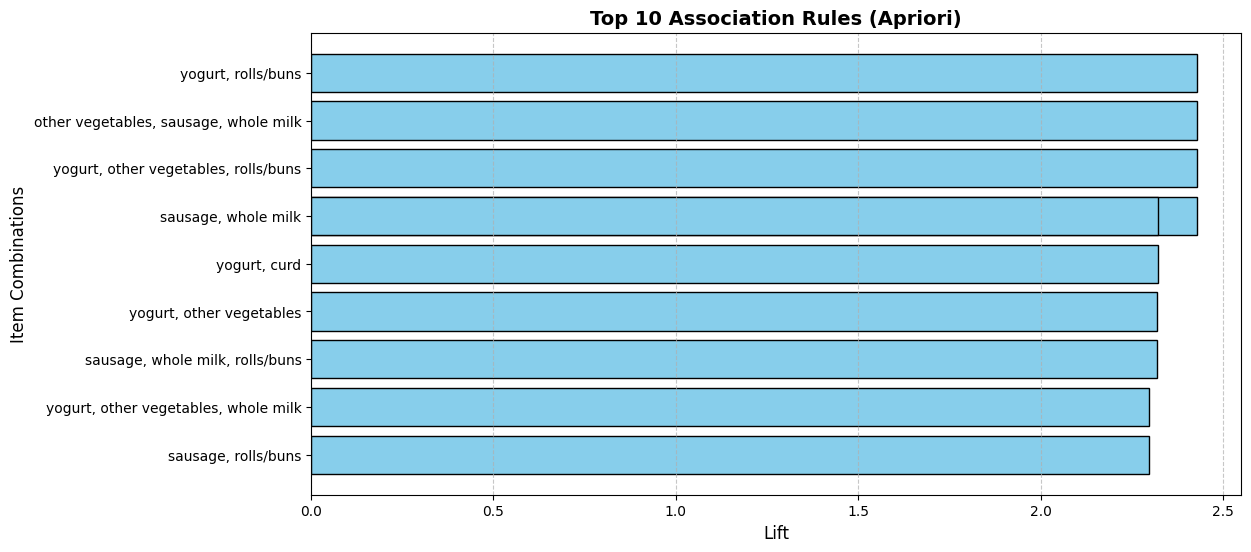

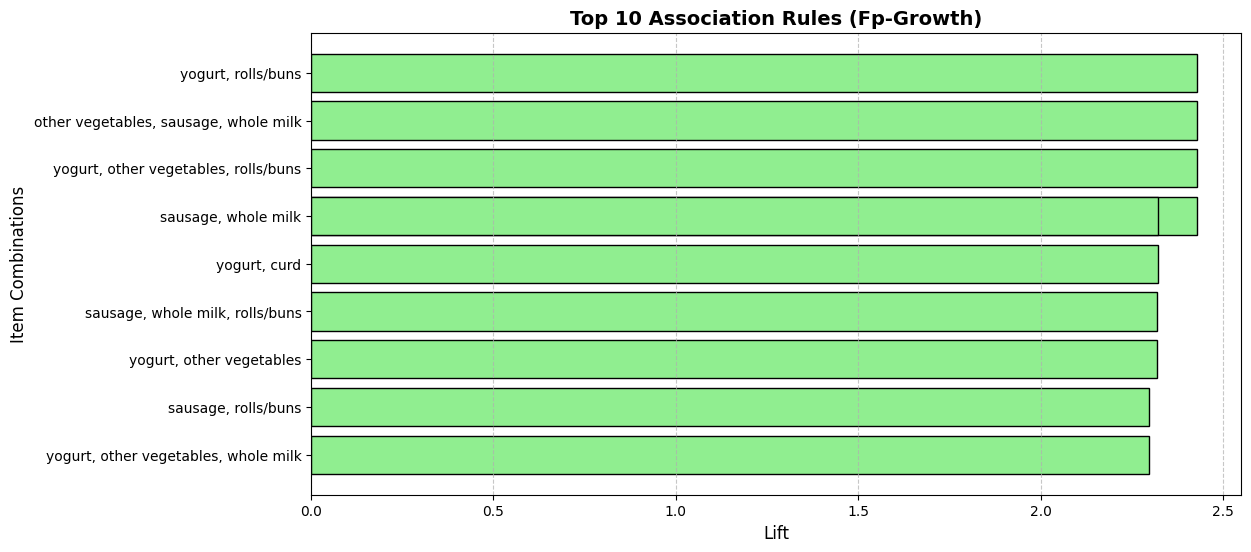

In [33]:
def plot_top_rules(rules_df, title, color):
    rules_sorted = rules_df.sort_values('lift', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    plt.barh(rules_sorted['antecedents'], rules_sorted['lift'], color=color, edgecolor='black')
    plt.xlabel('Lift', fontsize=12)
    plt.ylabel('Item Combinations', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
plot_top_rules(rules_ap, 'Top 10 Association Rules (Apriori)', 'skyblue')
plot_top_rules(rules_fp, 'Top 10 Association Rules (Fp-Growth)', 'lightgreen')

### **Heatmap of Frequent Itemsets**

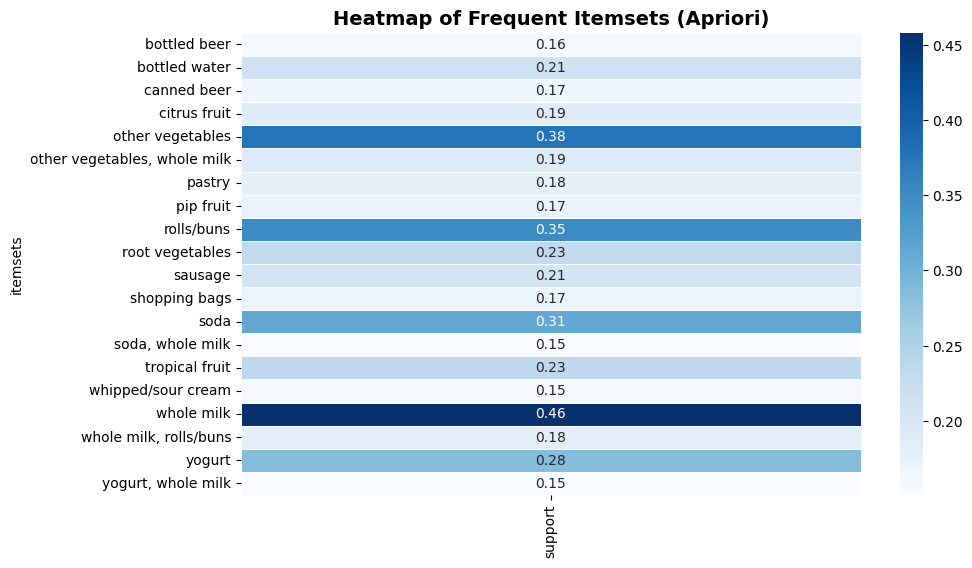

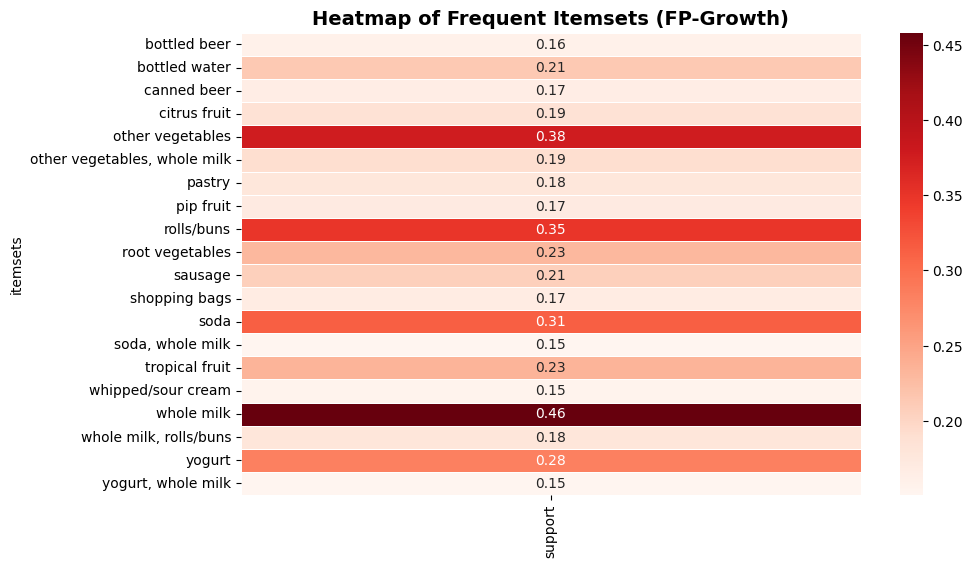

In [37]:
def plot_heatmap(frequent_itemsets_df, title, cmap):
    frequent_itemsets_df = frequent_itemsets_df.sort_values(by="support", ascending=False).head(20)
    frequent_itemsets_df['itemsets'] = frequent_itemsets_df['itemsets'].apply(lambda x: ', '.join(list(x)))
    plt.figure(figsize=(10, 6))
    sns.heatmap(frequent_itemsets_df.pivot_table(index='itemsets', values='support'),
                cmap=cmap, annot=True, fmt='.2f', linewidths=0.5)

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
plot_heatmap(frequent_itemsets_ap, 'Heatmap of Frequent Itemsets (Apriori)', 'Blues')
plot_heatmap(frequent_itemsets_fp, 'Heatmap of Frequent Itemsets (FP-Growth)', 'Reds')


## **Final Summary & Completion Message**

In [21]:
print('Market Basket Analysis Completed! All insights & visualizations are included.')

Market Basket Analysis Completed! All insights & visualizations are included.
